In [1]:
import deepsudoku
import os
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import deepsudoku.reinforcement_learning
from deepsudoku.reinforcement_learning.ensemble import *
os.chdir(deepsudoku.REPO_PATH)

from nonestop.agents import *

Sudoku Environment avaible at gymnasium as 'Sudoku-v0'.


In [2]:
env = gym.make("Sudoku-x1", )

agent = SeperateOnlyConv(True).cuda()
agent.load_state_dict(torch.load("nonestop/ckpt/Sudoku-nostop0__AnealLRLonger__1__1693545846/58578944.pth")["model_state_dict"])

obs, _ = env.reset()

100%|██████████| 1000/1000 [00:53<00:00, 18.84it/s]


(array([ 37.,  30.,  54.,  20.,  23.,  41.,  15.,   7.,  18.,  12.,  16.,
          7.,   5.,  11.,   4.,   2.,   1.,   0., 697.]),
 array([ 0.        ,  1.36842105,  2.73684211,  4.10526316,  5.47368421,
         6.84210526,  8.21052632,  9.57894737, 10.94736842, 12.31578947,
        13.68421053, 15.05263158, 16.42105263, 17.78947368, 19.15789474,
        20.52631579, 21.89473684, 23.26315789, 24.63157895, 26.        ]),
 <BarContainer object of 19 artists>)

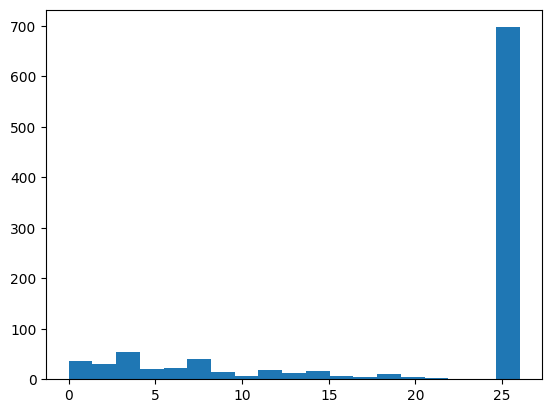

In [3]:
def eval_majority():
    
    obs, _ = env.reset()
    
    terminated = False
    episodic_reward = 0
    episode_length = 0
    
    while not terminated:
        

        action = ensemble(obs, agent, 10, 5, 1)
        
        obs, reward, terminated , _, _ = env.step(action)

        episodic_reward += reward

        if terminated:
            
            return episodic_reward, episode_length
    
        episode_length += 1
        
        
rewards = []
lengths = []

for _ in tqdm.tqdm(range(1000)):
    
    episodic_reward, episode_length = eval_majority()
    rewards.append(episodic_reward)
    lengths.append(episode_length)

plt.hist(lengths, bins = 19)
        

100%|██████████| 1000/1000 [00:53<00:00, 18.70it/s]


(array([ 51.,  29.,  41.,  16.,  29.,  32.,  18.,  16.,  16.,   7.,  14.,
          9.,   6.,   7.,   3.,   2.,   2.,   0., 702.]),
 array([ 0.        ,  1.36842105,  2.73684211,  4.10526316,  5.47368421,
         6.84210526,  8.21052632,  9.57894737, 10.94736842, 12.31578947,
        13.68421053, 15.05263158, 16.42105263, 17.78947368, 19.15789474,
        20.52631579, 21.89473684, 23.26315789, 24.63157895, 26.        ]),
 <BarContainer object of 19 artists>)

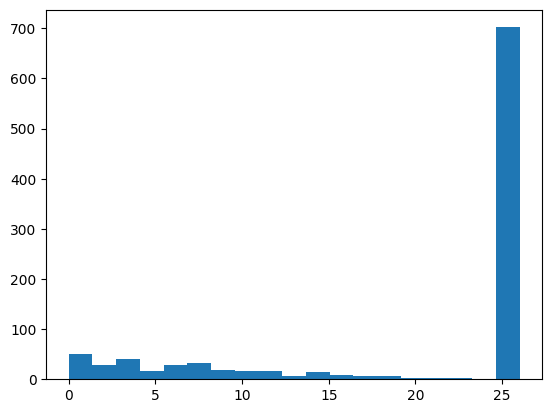

In [4]:
def eval_majority():
    
    obs, _ = env.reset()
    
    terminated = False
    episodic_reward = 0
    episode_length = 0
    
    while not terminated:
        

        action = ensemble(obs, agent, 10, 5, 1, "majority")
        
        obs, reward, terminated , _, _ = env.step(action)

        episodic_reward += reward

        if terminated:
            
            return episodic_reward, episode_length
    
        episode_length += 1
        
        
rewards = []
lengths = []

for _ in tqdm.tqdm(range(1000)):
    
    episodic_reward, episode_length = eval_majority()
    rewards.append(episodic_reward)
    lengths.append(episode_length)

plt.hist(lengths, bins = 19)
        

In [7]:
(np.array(lengths)==26).mean()

0.701